<a href="https://colab.research.google.com/github/illhyhl1111/AI_Expert_2021/blob/main/Lab6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/Colab Notebooks'
!pwd

In [ ]:
# !git clone https://github.com/eriklindernoren/PyTorch-YOLOv3
%cd 'PyTorch-YOLOv3/'

In [ ]:
!pip3 install pytorchyolo --user
!pip3 uninstall Pillow -y
!pip3 install Pillow
!pip uninstall torchvision -y
!pip install torchvision

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/PyTorch-YOLOv3/weights/'
!bash download_weights.sh

In [ ]:
%cd "../"
!python3 pytorchyolo/detect.py

### Colab에서 YOLOv3 로드하기

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/PyTorch-YOLOv3'

In [3]:
from pytorchyolo.models import load_model
from pytorchyolo.detect import _create_data_loader
from pytorchyolo.utils.utils import load_classes, rescale_boxes, non_max_suppression, to_cpu, print_environment_info
from pytorchyolo.utils.transforms import Resize, DEFAULT_TRANSFORMS
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import numpy as np
from PIL import Image
import random
import matplotlib.patches as patches
from matplotlib.ticker import NullLocator
import matplotlib.pyplot as plt

In [11]:
def _draw_and_save_output_image(image_path, detections, img_size, classes):
    img = np.array(Image.open(image_path))
    plt.figure()
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    # Rescale boxes to original image
    detections = rescale_boxes(detections, img_size, img.shape[:2])
    unique_labels = detections[:, -1].cpu().unique()
    n_cls_preds = len(unique_labels)
    # Bounding-box colors
    cmap = plt.get_cmap("tab20b")
    colors = [cmap(i) for i in np.linspace(0, 1, n_cls_preds)]
    bbox_colors = random.sample(colors, n_cls_preds)
    for x1, y1, x2, y2, conf, cls_pred in detections:

        print(f"\t+ Label: {classes[int(cls_pred)]} | Confidence: {conf.item():0.4f}")

        box_w = x2 - x1
        box_h = y2 - y1

        color = bbox_colors[int(np.where(unique_labels == int(cls_pred))[0])]
        # Create a Rectangle patch
        bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, edgecolor=color, facecolor="none")
        # Add the bbox to the plot
        ax.add_patch(bbox)
        # Add label
        plt.text(
            x1,
            y1,
            s=classes[int(cls_pred)],
            color="white",
            verticalalignment="top",
            bbox={"color": color, "pad": 0})

    # Save generated image with detections
    plt.axis("off")
    plt.gca().xaxis.set_major_locator(NullLocator())
    plt.gca().yaxis.set_major_locator(NullLocator())
    plt.plot()
    plt.show()
    # filename = os.path.basename(image_path).split(".")[0]
    # output_path = os.path.join(output_path, f"{filename}.png")
    # plt.savefig(output_path, bbox_inches="tight", pad_inches=0.0)
    # plt.close()

	+ Label: person | Confidence: 0.9999


<Figure size 432x288 with 0 Axes>

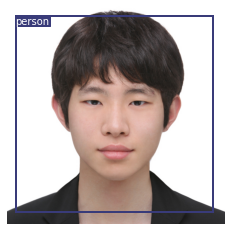

In [12]:
model = load_model("config/yolov3.cfg", "weights/yolov3.weights")
model.eval()
img_size = 416
conf_thres = 0.5
nms_thres = 0.4

classes = load_classes("data/coco.names")  # List of class names

# dataloader = _create_data_loader("data/samples", 1, img_size, 1)
dataloader = _create_data_loader("/content/drive/MyDrive/기타", 1, img_size, 1)

for (img_paths, input_imgs) in dataloader:
    input_imgs = Variable(input_imgs.type(torch.FloatTensor))

    # Get detections
    with torch.no_grad():
        detections = model(input_imgs)
        detections = non_max_suppression(detections, conf_thres, nms_thres)
        _draw_and_save_output_image(img_paths[0], detections[0], img_size, classes)